# Logistic Regression Exercises

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

## Problem 1: Binary Classification
## Running Logistic Regression on the Heart Dataset
- The dataset file is uploaded with this notebook as 'D6_Heart_Dataset_2.csv'. This dataset contains numeric data only.
- Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download
- This heart disease dataset is used for binary classification. 
- The dataset contains 304 observations.
- It has 13 features and 1 class label with 0 and 1 values. 
- The attributes are discussed below.
1. Age in years
2. Gender (1 = male; 0 = female)
3. Cp chest pain type:  
   Value 1: typical angina,
   Value 2: atypical angina,
   Value 3: non-anginal pain
   Value 4: asymptomatic,
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
12. (ca) number of major vessels (0-3) colored by flourosopy
13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target 1 or 0 (num) (the predicted attribute) diagnosis of heart disease (angiographic disease status):
    Value 0: < 50% diameter narrowing,
    Value 1: > 50% diameter narrowing,


In [2]:
#Loading and viewing the dataset
dataset=pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#Moving features and target into separate dataframes
features=dataset.drop('target',axis=1)
target=dataset['target']
#Splitting the dataset into train and test 
X_train,X_test,Y_train,Y_test = train_test_split(features, target,test_size=0.2,random_state=0)

### Model 1: Running Logictic Regression with standard settings
- Regularization is applied by default in LogisticRegression.

In [4]:
%%time

#Creating logistic regression object
#logistic_regression_model1 = LogisticRegression(random_state=0)
logistic_regression_model1 = LogisticRegression(random_state=0, max_iter=1000)

#Use the following statement if you want to try another solver like 'liblinear', otherwise default solver is 'lbfgs'.
#logistic_regression_model1 = LogisticRegression(solver="liblinear", random_state=0)

# Train model
model1 = logistic_regression_model1.fit(X_train, Y_train)

CPU times: total: 531 ms
Wall time: 528 ms


In [5]:
#Making predictions on test data
Y_pred_model1 = model1.predict(X_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model1)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model1))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model1))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model1))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model1))
print(len(X_train))

The accuracy is 86.34146341463415%
[[ 77  21]
 [  7 100]]
Precision:  0.8264462809917356
Recall score:  0.9345794392523364
F1 score:  0.8771929824561404
820


### Model 2: Running Logistic Regression with scaling (standardization)
- Both test and train sets need to be scaled.

In [6]:
#Let us see values in X_train
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [7]:
#Standardizing train data
standard_scaler = preprocessing.StandardScaler()
X_train_standardized=pd.DataFrame(standard_scaler.fit_transform(X_train)) # returns standardized array
X_train_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.405034,0.648956,1.977486,0.947890,-0.058677,-0.422091,-0.971846,1.258177,-0.720082,-0.212795,0.970286,1.174275,-0.514423
1,1.262700,-1.540937,1.011710,0.832696,0.595166,-0.422091,-0.971846,0.128065,-0.720082,-0.928291,-0.666822,0.216160,-0.514423
2,-0.182322,0.648956,1.011710,-0.088854,-0.020216,2.369157,-0.971846,1.040848,-0.720082,-0.928291,0.970286,2.132389,-0.514423
3,0.373456,-1.540937,-0.919843,-1.816760,0.018246,-0.422091,-0.971846,-1.175910,-0.720082,-0.033921,-0.666822,-0.741955,-0.514423
4,-0.182322,0.648956,-0.919843,-0.492032,0.672089,-0.422091,0.921061,-2.349489,1.388730,0.860450,-0.666822,1.174275,1.101771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,-0.626945,0.648956,1.011710,-0.780016,-1.885593,-0.422091,-0.971846,-1.002047,-0.720082,-0.212795,0.970286,2.132389,-0.514423
816,1.373856,-1.540937,1.011710,-0.952807,6.095144,-0.422091,-0.971846,0.475792,-0.720082,0.502702,-0.666822,-0.741955,1.101771
817,1.151545,0.648956,1.977486,0.371921,0.672089,2.369157,-0.971846,1.084314,-0.720082,0.323827,-0.666822,0.216160,-0.514423
818,1.373856,0.648956,-0.919843,-0.664822,-0.193292,-0.422091,0.921061,-3.392669,-0.720082,-0.033921,-0.666822,-0.741955,-0.514423


In [8]:
#Standardizing test data
X_test_standardized=pd.DataFrame(standard_scaler.fit_transform(X_test))
X_test_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.033006,0.712287,1.094764,-0.104424,-0.177407,-0.405922,0.778871,1.291979,1.467599,-0.588698,1.104950,-0.693599,-0.553002
1,0.471932,-1.403928,0.097312,0.227467,1.557309,2.463527,-1.144846,0.115230,-0.681385,-0.880908,1.104950,1.367093,-0.553002
2,1.009410,0.712287,-0.900139,0.448728,-1.105279,-0.405922,-1.144846,-0.233436,1.467599,2.041199,1.104950,1.367093,1.043695
3,0.471932,0.712287,1.094764,0.448728,-0.621172,2.463527,-1.144846,0.681813,-0.681385,-0.880908,1.104950,-0.693599,-0.553002
4,0.794418,0.712287,-0.900139,-0.657577,0.367213,-0.405922,0.778871,-0.407769,1.467599,1.748988,-0.468069,0.336747,1.043695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.140502,-1.403928,1.094764,-0.546946,-0.580830,-0.405922,0.778871,0.681813,-0.681385,-0.734803,-0.468069,-0.693599,-0.553002
201,-0.065546,-1.403928,-0.900139,-0.104424,0.447897,-0.405922,-1.144846,-0.277020,-0.681385,-0.588698,-0.468069,-0.693599,-0.553002
202,-1.140502,-1.403928,1.094764,-0.546946,-0.580830,-0.405922,0.778871,0.681813,-0.681385,-0.734803,-0.468069,-0.693599,-0.553002
203,1.331896,-1.403928,-0.900139,2.550706,-0.278263,2.463527,0.778871,0.681813,1.467599,-0.150382,-0.468069,1.367093,1.043695


In [9]:
#Creating logistic regression object
logistic_regression_model2 = LogisticRegression(random_state=0)

#Training the model
model2 = logistic_regression_model2.fit(X_train_standardized, Y_train)

#Making predictions on test data
Y_pred_model2 = model2.predict(X_test_standardized)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model2)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model2))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model2))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model2))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model2))

The accuracy is 85.85365853658537%
[[77 21]
 [ 8 99]]
Precision:  0.825
Recall score:  0.9252336448598131
F1 score:  0.8722466960352423


### Model 3: Running Logistic Regression with scaling (Normalization)
- Both test and train sets need to be scaled.

In [10]:
#Normalizing the train data
normal_scaler = preprocessing.MinMaxScaler()
X_train_normalized=pd.DataFrame(normal_scaler.fit_transform(X_train)) # returns standardized array
X_train_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.270833,1.0,1.000000,0.509434,0.269406,0.0,0.0,0.816794,0.0,0.129032,1.0,0.50,0.666667
1,0.770833,0.0,0.666667,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.5,0.25,0.666667
2,0.500000,1.0,0.666667,0.339623,0.273973,1.0,0.0,0.778626,0.0,0.000000,1.0,0.75,0.666667
3,0.604167,0.0,0.000000,0.056604,0.278539,0.0,0.0,0.389313,0.0,0.161290,0.5,0.00,0.666667
4,0.500000,1.0,0.000000,0.273585,0.356164,0.0,0.5,0.183206,1.0,0.322581,0.5,0.50,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.416667,1.0,0.666667,0.226415,0.052511,0.0,0.0,0.419847,0.0,0.129032,1.0,0.75,0.666667
816,0.791667,0.0,0.666667,0.198113,1.000000,0.0,0.0,0.679389,0.0,0.258065,0.5,0.00,1.000000
817,0.750000,1.0,1.000000,0.415094,0.356164,1.0,0.0,0.786260,0.0,0.225806,0.5,0.25,0.666667
818,0.791667,1.0,0.000000,0.245283,0.253425,0.0,0.5,0.000000,0.0,0.161290,0.5,0.00,0.666667


In [11]:
#Normalizing the test data
X_test_normalized=pd.DataFrame(normal_scaler.fit_transform(X_test)) # returns standardized array
X_test_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.319149,1.0,0.666667,0.339623,0.380783,0.0,0.5,0.824427,1.0,0.064516,1.0,0.00,0.666667
1,0.617021,0.0,0.333333,0.396226,0.686833,1.0,0.0,0.618321,0.0,0.000000,1.0,0.50,0.666667
2,0.723404,1.0,0.000000,0.433962,0.217082,0.0,0.0,0.557252,1.0,0.645161,1.0,0.50,1.000000
3,0.617021,1.0,0.666667,0.433962,0.302491,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667
4,0.680851,1.0,0.000000,0.245283,0.476868,0.0,0.5,0.526718,1.0,0.580645,0.5,0.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.297872,0.0,0.666667,0.264151,0.309609,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667
201,0.510638,0.0,0.000000,0.339623,0.491103,0.0,0.0,0.549618,0.0,0.064516,0.5,0.00,0.666667
202,0.297872,0.0,0.666667,0.264151,0.309609,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667
203,0.787234,0.0,0.000000,0.792453,0.362989,1.0,0.5,0.717557,1.0,0.161290,0.5,0.50,1.000000


In [12]:
#Creating logistic regression object
logistic_regression_model3 = LogisticRegression(random_state=0)

#Training the model
model3 = logistic_regression_model3.fit(X_train_normalized, Y_train)

#Making predictions
Y_pred_model3 = model3.predict(X_test_normalized)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model3)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model3))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model3))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model3))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model3))

The accuracy is 87.3170731707317%
[[81 17]
 [ 9 98]]
Precision:  0.8521739130434782
Recall score:  0.9158878504672897
F1 score:  0.8828828828828829


### Model 4: Running K-Nearest Neighbour (a non-parametric algorithm)

In [13]:
model4 = KNeighborsClassifier()
model4.fit(X_train, Y_train)
Y_pred_model4 = pd.DataFrame(model4.predict(X_test))
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_model4)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_model4))
print('Precision: ',metrics.precision_score(Y_test,Y_pred_model4))
print('Recall score: ',metrics.recall_score(Y_test,Y_pred_model4))
print('F1 score: ',metrics.f1_score(Y_test,Y_pred_model4))

The accuracy is 74.63414634146342%
[[74 24]
 [28 79]]
Precision:  0.7669902912621359
Recall score:  0.7383177570093458
F1 score:  0.7523809523809523


## Problem 2: Multiclass Classification
## Running Logistic Regression on number dataset from sklearn
- This a dataset of images of digits provided by sklearn library.
- Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
- Number of classes: 10 (1 for each digit from 0 to 9).
- Total samples: 5620
- Size of each sample: 8 x 8
- Dimensions: 64

### Loading and exploring the number dataset fron sklearn

In [14]:
#Loading dataset from sklearn
digit_dataset=load_digits()

In [15]:
#Printing description of the dataset
print(dir(digit_dataset))
print(digit_dataset.DESCR)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

In [19]:
#Displaying features
digit_dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
#Displaying target
digit_dataset.target

array([0, 1, 2, ..., 8, 9, 8])

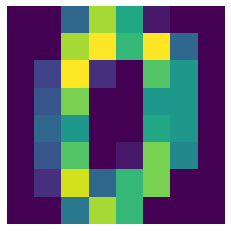

In [17]:
#Taking a peak on one of the images
some_digit = digit_dataset.data[0]
plt.imshow(some_digit.reshape(8, 8))
plt.axis("off")
plt.show()

In [18]:
#Looks like a 0, let's check the corresponding target value
digit_dataset.target[0]

0

In [19]:
#Splitting the dataset
X2_train,X2_test,Y2_train,Y2_test = train_test_split(digit_dataset.data, digit_dataset.target,test_size=0.2,random_state=0)

### Model 5: Running Logistic Regression
- The model in Problem 2 is number 5 just to avoid name clashes with models of problem 1.

In [20]:
%%time
#Creating logistic regression object
#logistic_regression_model5 = LogisticRegression(random_state=0)
logistic_regression_model5 = LogisticRegression(random_state=0, max_iter=10000)
#Training the model
model5 = logistic_regression_model5.fit(X2_train, Y2_train)

CPU times: total: 7.12 s
Wall time: 4.37 s


In [25]:
#Making predictions
Y2_pred_model5 = model5.predict(X2_test)
print("The accuracy is "+str(metrics.accuracy_score(Y2_test,Y2_pred_model5)*100)+"%")
c_matrix=confusion_matrix(Y2_test, Y2_pred_model5)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average=None))
print('Micro Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y2_test,Y2_pred_model5,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average=None))
print('Micro Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y2_test,Y2_pred_model5,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average=None))
print('Micro F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average='macro'))
print('Weighted F1 score: ',metrics.f1_score(Y2_test,Y2_pred_model5,average='weighted'))


The accuracy is 95.83333333333334%
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  2  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  1 39]]
Precision:  [1.         0.91176471 0.97222222 0.96666667 0.96774194 0.97368421
 0.97727273 1.         0.92307692 0.90697674]
Micro Precision:  0.9583333333333334
Macro Precision:  0.9599406135317124
Weighted Precision:  0.958641030656701

Recall score:  [1.         0.88571429 0.97222222 1.         1.         0.925
 0.97727273 0.97435897 0.92307692 0.95121951]
Micro Recall score:  0.9583333333333334
Macro Recall score:  0.9608864644840255
Weighted Recall score:  0.9583333333333334

F1 score:  [1.         0.89855072 0.97222222 0.98305085 0.98360656 0.94871795
 0.97727273 0.98701299 0.92307692 0.92857143]
Micro F1 score:  0.95833

## Problem 3: Multiclass Multioutput Classification

### Creating two labels (outputs) on same data
- Label 1: For large numbers greater than 7
- Label 2: For odd numbers

In [21]:
#Creating two labels for train data
y2_train_large = np.array((Y2_train.astype(np.float) >= 7))
y2_multilabel_train = pd.DataFrame(data=y2_train_large, columns=['large'])
y2_train_odd = np.array((Y2_train.astype(np.float) % 2 == 1))
y2_multilabel_train['odd'] = y2_train_odd
y2_multilabel_train

C:\Users\DELL LATITUDE E 5470\AppData\Local\Temp\ipykernel_8476\3774156419.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y2_train_large = np.array((Y2_train.astype(np.float) >= 7))
C:\Users\DELL LATITUDE E 5470\AppData\Local\Temp\ipykernel_8476\3774156419.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y2_train_odd = np.array((Y

,large,odd
0,False,False
1,False,True
2,False,True
3,False,False
4,False,False
...,...,...
1432,False,True
1433,False,True
1434,True,True
1435,True,True


In [22]:
#Creating two labels for test data
y2_test_large = np.array((Y2_test.astype(np.float) >= 7))
y2_multilabel_test = pd.DataFrame(data=y2_test_large, columns=['large'])
y2_test_odd = np.array((Y2_test.astype(np.float) % 2 == 1))
y2_multilabel_test['odd'] = y2_test_odd
y2_multilabel_test

C:\Users\DELL LATITUDE E 5470\AppData\Local\Temp\ipykernel_8476\3466171306.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y2_test_large = np.array((Y2_test.astype(np.float) >= 7))
C:\Users\DELL LATITUDE E 5470\AppData\Local\Temp\ipykernel_8476\3466171306.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y2_test_odd = np.array((Y2_t

,large,odd
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
...,...,...
355,False,True
356,False,False
357,False,True
358,True,False


### Model 6: Running K-Nearest Neighbours on multiclass output

In [23]:
#Running K-Nearest Neighbours on train data and testing on test data
model6 = KNeighborsClassifier()
model6.fit(X2_train, y2_multilabel_train)
Y2_pred_model6 = pd.DataFrame(model6.predict(X2_test),columns=['large','odd'])

In [24]:
#c_matrix for 'large'
c_matrix_large=confusion_matrix(y2_multilabel_test['large'], Y2_pred_model6['large'])
print(c_matrix_large)
print('Precision: ',metrics.precision_score(y2_multilabel_test['large'], Y2_pred_model6['large']))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['large'], Y2_pred_model6['large']))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['large'], Y2_pred_model6['large']))

[[239   2]
 [  4 115]]
Precision:  0.9829059829059829
Recall score:  0.9663865546218487
F1 score:  0.9745762711864406


In [25]:
#c_matrix for 'odd'
c_matrix_odd=confusion_matrix(y2_multilabel_test['odd'], Y2_pred_model6['odd'])
print(c_matrix_odd)
print('Precision: ',metrics.precision_score(y2_multilabel_test['odd'], Y2_pred_model6['odd']))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['odd'], Y2_pred_model6['odd']))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['odd'], Y2_pred_model6['odd']))

[[171   5]
 [  0 184]]
Precision:  0.9735449735449735
Recall score:  1.0
F1 score:  0.9865951742627346


### Model 7: Running Logistic Regression on multiclass output
- Unlike K-Nearest Neighbours, logistic regression doesnot support multioutput classification directly.
- We will have to run it separately on each output.

In [26]:
#Running Logistic Regression on first output 'large'

#Creating logistic regression object
logistic_regression_model7 = LogisticRegression(random_state=0, max_iter=10000)
#Training the model
model7_large = logistic_regression_model7.fit(X2_train, y2_multilabel_train['large'])
model7_odd = logistic_regression_model7.fit(X2_train, y2_multilabel_train['odd'])

In [27]:
#Making predictions for output 'large'
Y2_pred_model7 = model7_large.predict(X2_test)
print("The accuracy is "+str(metrics.accuracy_score(y2_multilabel_test['large'],Y2_pred_model7)*100)+"%")
c_matrix=confusion_matrix(y2_multilabel_test['large'],Y2_pred_model7)
print(c_matrix)
print('Precision: ',metrics.precision_score(y2_multilabel_test['large'],Y2_pred_model7))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['large'],Y2_pred_model7))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['large'],Y2_pred_model7))

The accuracy is 61.94444444444444%
[[136 105]
 [ 32  87]]
Precision:  0.453125
Recall score:  0.7310924369747899
F1 score:  0.5594855305466238


In [28]:
#Making predictions for output 'odd'
Y2_pred_model7 = model7_odd.predict(X2_test)
print("The accuracy is "+str(metrics.accuracy_score(y2_multilabel_test['odd'],Y2_pred_model7)*100)+"%")
c_matrix=confusion_matrix(y2_multilabel_test['odd'],Y2_pred_model7)
print(c_matrix)
print('Precision: ',metrics.precision_score(y2_multilabel_test['odd'],Y2_pred_model7))
print('Recall score: ',metrics.recall_score(y2_multilabel_test['odd'],Y2_pred_model7))
print('F1 score: ',metrics.f1_score(y2_multilabel_test['odd'],Y2_pred_model7))

The accuracy is 92.22222222222223%
[[158  18]
 [ 10 174]]
Precision:  0.90625
Recall score:  0.9456521739130435
F1 score:  0.9255319148936171
